In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv("ex1data2 (1).txt",names=['size','bedrooms','price'])
data.head()

,size,bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


2.特征归一化

In [8]:
def normalize_feature(data):
    return(data-data.mean())/data.std()

In [10]:
data=normalize_feature(data)
data.head()

,size,bedrooms,price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


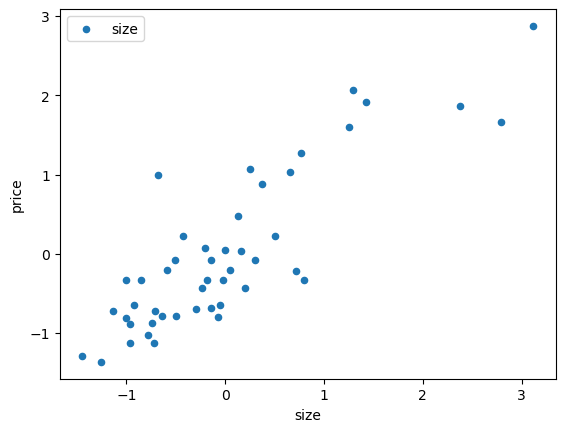

In [11]:
data.plot.scatter('size','price',label='size')
plt.show()

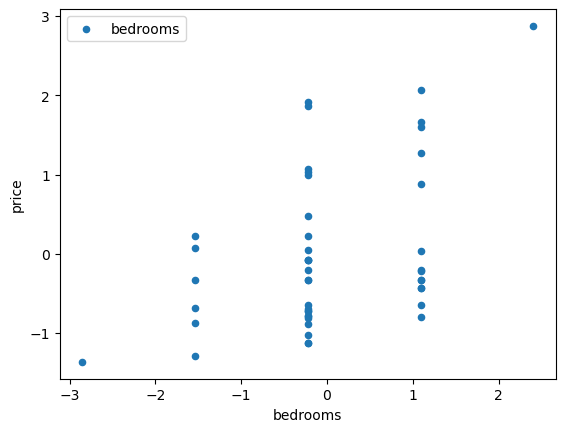

In [12]:
data.plot.scatter('bedrooms','price',label='bedrooms')
plt.show()

添加全为1的列

In [13]:
data.insert(0,'ones',1)
data.head()

,ones,size,bedrooms,price
0,1,0.130010,-0.223675,0.475747
1,1,-0.504190,-0.223675,-0.084074
2,1,0.502476,-0.223675,0.228626
3,1,-0.735723,-1.537767,-0.867025
4,1,1.257476,1.090417,1.595389


构造数据集

In [15]:
X=data.iloc[:,0:-1]
X.head()

,ones,size,bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417


In [16]:
y=data.iloc[:,-1]
y.head()

0    0.475747
1   -0.084074
2    0.228626
3   -0.867025
4    1.595389
Name: price, dtype: float64

转成数组

In [17]:
X=X.values
X.shape

(47, 3)

In [18]:
y=y.values
y.shape

(47,)

In [19]:
y=y.reshape(47,1)

In [20]:
y.shape

(47, 1)

In [28]:
def costFunction(X,y,theta):
    inner=np.power(X@theta-y,2)
    return np.sum(inner)/(2*len(X))

In [29]:
theta=np.zeros((3,1))

In [30]:
cost_init=costFunction(X,y,theta)
print(cost_init)

0.4893617021276598


梯度下降

In [31]:
def gradientDescent(X,y,theta,alpha,iters):
    costs = []
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)
            
    return theta,costs

In [32]:
alpha = 0.02
iters = 2000

theta,costs = gradientDescent(X,y,theta,alpha,iters)

0.471863078323805
0.14769069097087117
0.1336126068627211
0.13120498443304696
0.13077838964126165
0.13070277225055468
0.13068936839094536
0.1306869924366786
0.13068657127748678
0.13068649662324475
0.13068648339011116
0.13068648104441954
0.13068648062862473
0.13068648055492138
0.13068648054185678
0.13068648053954093
0.13068648053913046
0.1306864805390577
0.1306864805390448
0.1306864805390425


不同alpha的效果

In [36]:
candinate_alpha=[0.0003,0.003,0.03,0.0001,0.001,0.01]
iters=2000

0.1306864805390421
0.13068648053904214
0.1306864805390421
0.13068648053904208
0.13068648053904208
0.1306864805390421
0.13068648053904205
0.1306864805390421
0.1306864805390421
0.13068648053904208
0.1306864805390421
0.1306864805390421
0.13068648053904208
0.13068648053904208
0.13068648053904208
0.1306864805390421
0.13068648053904205
0.13068648053904208
0.13068648053904205
0.13068648053904208
0.13068648053904208
0.13068648053904205
0.13068648053904205
0.13068648053904205
0.13068648053904205
0.13068648053904205
0.13068648053904203
0.13068648053904205
0.13068648053904203
0.130686480539042
0.13068648053904205
0.13068648053904205
0.13068648053904203
0.13068648053904205
0.13068648053904203
0.13068648053904203
0.13068648053904205
0.13068648053904205
0.130686480539042
0.13068648053904203
0.1306864805390421
0.13068648053904205
0.13068648053904203
0.13068648053904203
0.13068648053904203
0.130686480539042
0.13068648053904203
0.130686480539042
0.13068648053904203
0.130686480539042
0.13068648053904203

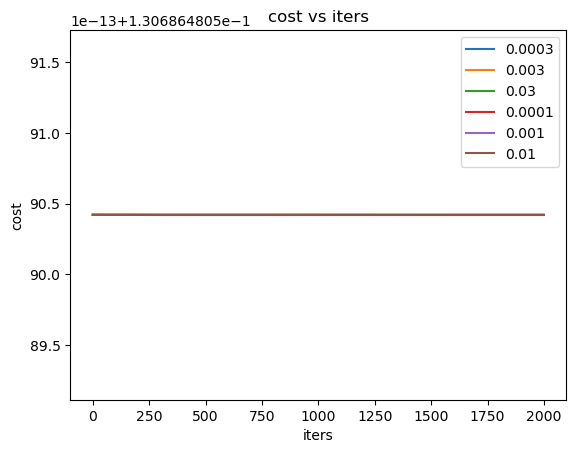

In [39]:
fig,ax=plt.subplots()
    
for alpha in candinate_alpha:
    _,costs=gradientDescent(X,y,theta,alpha,iters)
    ax.plot(np.arange(iters),costs,label=alpha)
    ax.legend()
    
ax.set(xlabel='iters',
      ylabel='cost',
      title='cost vs iters')
plt.show()

In [40]:
theta

array([[-4.38419986e-17],
       [ 8.84765973e-01],
       [-5.31788053e-02]])